### Project 7 

In this project, you will implement the clustering techniques that you've learned this week. 

#### Step 1: Load the python libraries that you will need for this project 

In [1]:
%matplotlib inline

import pandas as pd 
import matplotlib as plt
import numpy as np
from scipy.stats import pearsonr, normaltest
from sklearn import preprocessing
from sklearn.preprocessing import LabelEncoder
from sklearn.decomposition import PCA
from sklearn import metrics

from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA 

from sqlalchemy import create_engine
import seaborn as sns

#### Step 2: Examine your data 

In [2]:
df_init = pd.read_csv('/Users/ryangin/Desktop/General_Assembly/DSI_SM_01/projects/01-projects-weekly/project-07/assets/Airport_operations.csv')
df1 = df_init.dropna() 
print df1.head()

  airport  year  departures for metric computation  \
0     ABQ  2004                              53971   
1     ABQ  2005                              51829   
2     ABQ  2006                              49682   
3     ABQ  2007                              53255   
4     ABQ  2008                              49589   

   arrivals for metric computation  percent on-time gate departures  \
0                            53818                           0.8030   
1                            51877                           0.8140   
2                            51199                           0.7983   
3                            53611                           0.8005   
4                            49512                           0.8103   

   percent on-time airport departures  percent on-time gate arrivals  \
0                              0.7809                         0.7921   
1                              0.7922                         0.8001   
2                              0

In [3]:
df_init2 = pd.read_csv('/Users/ryangin/Desktop/General_Assembly/DSI_SM_01/projects/01-projects-weekly/project-07/assets/airport_cancellations.csv')
df2 = df_init2.dropna() 
print df2.head()

  Airport    Year  Departure Cancellations  Arrival Cancellations  \
0     ABQ  2004.0                    242.0                  235.0   
1     ABQ  2005.0                    221.0                  190.0   
2     ABQ  2006.0                    392.0                  329.0   
3     ABQ  2007.0                    366.0                  304.0   
4     ABQ  2008.0                    333.0                  300.0   

   Departure Diversions  Arrival Diversions  
0                  71.0                46.0  
1                  61.0                33.0  
2                  71.0               124.0  
3                 107.0                45.0  
4                  79.0                42.0  


### Intro: Write a problem statement / aim for this project

We want to understand the behavior of flight cancellations
Answer: 

### Part 1: Create a PostgreSQL database 

#### 1. Let's create a database where we can house our airport data

In [4]:
import mysecrets as mypass #save mysecrets.py, var password
print mypass.dbname

airports


In [5]:
engine = create_engine('postgres://%s:%s@%s:%s/%s' % (mypass.username,mypass.password, mypass.host, mypass.port, mypass.dbname))

In [6]:
#df1.to_sql('table_1', con = engine, if_exists='fail') # Sends the table into the database; can only do this once

In [7]:
#df2.to_sql('table_2', con = engine, if_exists='fail') # Sends the table into the database; can only do this once

Load our csv files into tables

In [8]:
airport1 = pd.read_sql('SELECT * FROM table_1', con = engine) #encoding='utf-8'
airport1.head()

,index,airport,year,departures for metric computation,arrivals for metric computation,percent on-time gate departures,percent on-time airport departures,percent on-time gate arrivals,average_gate_departure_delay,average_taxi_out_time,average taxi out delay,average airport departure delay,average airborne delay,average taxi in delay,average block delay,average gate arrival delay
0,0,ABQ,2004,53971,53818,0.8030,0.7809,0.7921,10.38,9.89,2.43,12.10,2.46,0.83,2.55,10.87
1,1,ABQ,2005,51829,51877,0.8140,0.7922,0.8001,9.60,9.79,2.29,11.20,2.26,0.89,2.34,10.24
2,2,ABQ,2006,49682,51199,0.7983,0.7756,0.7746,10.84,9.89,2.16,12.33,2.12,0.84,2.66,11.82
3,3,ABQ,2007,53255,53611,0.8005,0.7704,0.7647,11.29,10.34,2.40,12.95,2.19,1.29,3.06,12.71
4,4,ABQ,2008,49589,49512,0.8103,0.7844,0.7875,10.79,10.41,2.41,12.32,1.82,1.03,2.79,11.48


In [9]:
airport2 = pd.read_sql('SELECT * FROM table_2', con = engine) #encoding='utf-8'
airport2.head()

,index,Airport,Year,Departure Cancellations,Arrival Cancellations,Departure Diversions,Arrival Diversions
0,0,ABQ,2004.0,242.0,235.0,71.0,46.0
1,1,ABQ,2005.0,221.0,190.0,61.0,33.0
2,2,ABQ,2006.0,392.0,329.0,71.0,124.0
3,3,ABQ,2007.0,366.0,304.0,107.0,45.0
4,4,ABQ,2008.0,333.0,300.0,79.0,42.0


In [10]:
airport2['airport'] = airport2['Airport']

In [11]:
del airport2['Airport']

In [12]:
airport2['year'] = airport2['Year']

In [13]:
del airport2['Year']

In [14]:
airport2.columns

Index([                  u'index', u'Departure Cancellations',
         u'Arrival Cancellations',    u'Departure Diversions',
            u'Arrival Diversions',                 u'airport',
                          u'year'],
      dtype='object')

In [15]:
airport2['year'] = airport2['year'].astype(int)

In [16]:
airport1.head()

,index,airport,year,departures for metric computation,arrivals for metric computation,percent on-time gate departures,percent on-time airport departures,percent on-time gate arrivals,average_gate_departure_delay,average_taxi_out_time,average taxi out delay,average airport departure delay,average airborne delay,average taxi in delay,average block delay,average gate arrival delay
0,0,ABQ,2004,53971,53818,0.8030,0.7809,0.7921,10.38,9.89,2.43,12.10,2.46,0.83,2.55,10.87
1,1,ABQ,2005,51829,51877,0.8140,0.7922,0.8001,9.60,9.79,2.29,11.20,2.26,0.89,2.34,10.24
2,2,ABQ,2006,49682,51199,0.7983,0.7756,0.7746,10.84,9.89,2.16,12.33,2.12,0.84,2.66,11.82
3,3,ABQ,2007,53255,53611,0.8005,0.7704,0.7647,11.29,10.34,2.40,12.95,2.19,1.29,3.06,12.71
4,4,ABQ,2008,49589,49512,0.8103,0.7844,0.7875,10.79,10.41,2.41,12.32,1.82,1.03,2.79,11.48


In [17]:
airport2.head()

,index,Departure Cancellations,Arrival Cancellations,Departure Diversions,Arrival Diversions,airport,year
0,0,242.0,235.0,71.0,46.0,ABQ,2004
1,1,221.0,190.0,61.0,33.0,ABQ,2005
2,2,392.0,329.0,71.0,124.0,ABQ,2006
3,3,366.0,304.0,107.0,45.0,ABQ,2007
4,4,333.0,300.0,79.0,42.0,ABQ,2008


Join airport_cancellations.csv and airports.csv into one table

In [18]:
JOIN = pd.read_sql('SELECT *\
                    FROM table_1\
                    LEFT JOIN table_2\
                    ON table_1."year"=table_2."Year" AND table_2."Airport" = table_1."airport" ;',con=engine)
JOIN.head()

,index,airport,year,departures for metric computation,arrivals for metric computation,percent on-time gate departures,percent on-time airport departures,percent on-time gate arrivals,average_gate_departure_delay,average_taxi_out_time,...,average taxi in delay,average block delay,average gate arrival delay,index,Airport,Year,Departure Cancellations,Arrival Cancellations,Departure Diversions,Arrival Diversions
0,0,ABQ,2004,53971,53818,0.8030,0.7809,0.7921,10.38,9.89,...,0.83,2.55,10.87,0.0,ABQ,2004.0,242.0,235.0,71.0,46.0
1,1,ABQ,2005,51829,51877,0.8140,0.7922,0.8001,9.60,9.79,...,0.89,2.34,10.24,1.0,ABQ,2005.0,221.0,190.0,61.0,33.0
2,2,ABQ,2006,49682,51199,0.7983,0.7756,0.7746,10.84,9.89,...,0.84,2.66,11.82,2.0,ABQ,2006.0,392.0,329.0,71.0,124.0
3,3,ABQ,2007,53255,53611,0.8005,0.7704,0.7647,11.29,10.34,...,1.29,3.06,12.71,3.0,ABQ,2007.0,366.0,304.0,107.0,45.0
4,4,ABQ,2008,49589,49512,0.8103,0.7844,0.7875,10.79,10.41,...,1.03,2.79,11.48,4.0,ABQ,2008.0,333.0,300.0,79.0,42.0


In [19]:
JOIN.columns

Index([u'index', u'airport', u'year', u'departures for metric computation',
       u'arrivals for metric computation', u'percent on-time gate departures',
       u'percent on-time airport departures', u'percent on-time gate arrivals',
       u'average_gate_departure_delay', u'average_taxi_out_time',
       u'average taxi out delay', u'average airport departure delay',
       u'average airborne delay', u'average taxi in delay',
       u'average block delay', u'average gate arrival delay', u'index',
       u'Airport', u'Year', u'Departure Cancellations',
       u'Arrival Cancellations', u'Departure Diversions',
       u'Arrival Diversions'],
      dtype='object')

Query the database for our intial data

In [20]:
df1 = pd.read_sql('SELECT * FROM table_1', con = engine) #encoding='utf-8'
df1.head()

,index,airport,year,departures for metric computation,arrivals for metric computation,percent on-time gate departures,percent on-time airport departures,percent on-time gate arrivals,average_gate_departure_delay,average_taxi_out_time,average taxi out delay,average airport departure delay,average airborne delay,average taxi in delay,average block delay,average gate arrival delay
0,0,ABQ,2004,53971,53818,0.8030,0.7809,0.7921,10.38,9.89,2.43,12.10,2.46,0.83,2.55,10.87
1,1,ABQ,2005,51829,51877,0.8140,0.7922,0.8001,9.60,9.79,2.29,11.20,2.26,0.89,2.34,10.24
2,2,ABQ,2006,49682,51199,0.7983,0.7756,0.7746,10.84,9.89,2.16,12.33,2.12,0.84,2.66,11.82
3,3,ABQ,2007,53255,53611,0.8005,0.7704,0.7647,11.29,10.34,2.40,12.95,2.19,1.29,3.06,12.71
4,4,ABQ,2008,49589,49512,0.8103,0.7844,0.7875,10.79,10.41,2.41,12.32,1.82,1.03,2.79,11.48


In [21]:
df2 = pd.read_sql('SELECT * FROM table_2', con = engine) #encoding='utf-8'
df2.head()

,index,Airport,Year,Departure Cancellations,Arrival Cancellations,Departure Diversions,Arrival Diversions
0,0,ABQ,2004.0,242.0,235.0,71.0,46.0
1,1,ABQ,2005.0,221.0,190.0,61.0,33.0
2,2,ABQ,2006.0,392.0,329.0,71.0,124.0
3,3,ABQ,2007.0,366.0,304.0,107.0,45.0
4,4,ABQ,2008.0,333.0,300.0,79.0,42.0


#### 1.2 What are the risks and assumptions of our data? 

This dataset comes from an unknown source and there are a few NaN values in the data that we would need to remove. It can sometimes be detrimental to remove NaN values but in this case we won't be removing too many.

### Part 2: Exploratory Data Analysis

#### 2.1 Plot and Describe the Data

In [22]:
df = JOIN
del df['Year']
del df['Airport']
del df['index']

In [23]:
df.columns

Index([u'airport', u'year', u'departures for metric computation',
       u'arrivals for metric computation', u'percent on-time gate departures',
       u'percent on-time airport departures', u'percent on-time gate arrivals',
       u'average_gate_departure_delay', u'average_taxi_out_time',
       u'average taxi out delay', u'average airport departure delay',
       u'average airborne delay', u'average taxi in delay',
       u'average block delay', u'average gate arrival delay',
       u'Departure Cancellations', u'Arrival Cancellations',
       u'Departure Diversions', u'Arrival Diversions'],
      dtype='object')

In [24]:
df.head(10)

,airport,year,departures for metric computation,arrivals for metric computation,percent on-time gate departures,percent on-time airport departures,percent on-time gate arrivals,average_gate_departure_delay,average_taxi_out_time,average taxi out delay,average airport departure delay,average airborne delay,average taxi in delay,average block delay,average gate arrival delay,Departure Cancellations,Arrival Cancellations,Departure Diversions,Arrival Diversions
0,ABQ,2004,53971,53818,0.8030,0.7809,0.7921,10.38,9.89,2.43,12.10,2.46,0.83,2.55,10.87,242.0,235.0,71.0,46.0
1,ABQ,2005,51829,51877,0.8140,0.7922,0.8001,9.60,9.79,2.29,11.20,2.26,0.89,2.34,10.24,221.0,190.0,61.0,33.0
2,ABQ,2006,49682,51199,0.7983,0.7756,0.7746,10.84,9.89,2.16,12.33,2.12,0.84,2.66,11.82,392.0,329.0,71.0,124.0
3,ABQ,2007,53255,53611,0.8005,0.7704,0.7647,11.29,10.34,2.40,12.95,2.19,1.29,3.06,12.71,366.0,304.0,107.0,45.0
4,ABQ,2008,49589,49512,0.8103,0.7844,0.7875,10.79,10.41,2.41,12.32,1.82,1.03,2.79,11.48,333.0,300.0,79.0,42.0
5,ABQ,2009,42550,42704,0.8341,0.8147,0.8224,9.24,9.88,1.89,10.45,1.74,0.92,1.98,9.27,192.0,162.0,74.0,26.0
6,ABQ,2010,42302,42169,0.8144,0.7907,0.8047,10.25,9.95,2.05,11.58,1.66,0.95,1.90,10.23,222.0,177.0,71.0,50.0
7,ABQ,2011,42283,42297,0.8072,0.7758,0.8022,10.81,10.50,2.51,12.57,1.58,0.84,1.87,10.63,345.0,294.0,77.0,61.0
8,ABQ,2012,39105,39107,0.8219,0.7940,0.8177,10.55,10.27,2.32,12.11,1.41,0.98,1.80,9.73,237.0,181.0,65.0,60.0
9,ABQ,2013,35277,34989,0.7710,0.7402,0.7554,12.56,10.77,2.64,14.28,1.60,0.92,2.35,12.76,232.0,212.0,62.0,46.0


In [25]:
df.describe()

,year,departures for metric computation,arrivals for metric computation,percent on-time gate departures,percent on-time airport departures,percent on-time gate arrivals,average_gate_departure_delay,average_taxi_out_time,average taxi out delay,average airport departure delay,average airborne delay,average taxi in delay,average block delay,average gate arrival delay,Departure Cancellations,Arrival Cancellations,Departure Diversions,Arrival Diversions
count,841.000000,841.000000,841.000000,841.000000,841.000000,841.000000,841.000000,841.000000,841.000000,841.000000,841.000000,841.000000,841.000000,841.000000,799.000000,799.000000,799.000000,799.000000
mean,2009.028537,108257.063020,107815.561237,0.764119,0.714283,0.754281,13.561403,13.703389,3.519750,16.249964,2.921237,1.348894,3.330773,14.013222,1299.314143,1341.068836,174.250313,170.256571
std,3.156497,98278.401526,97916.908601,0.093361,0.101271,0.082302,4.746563,3.792181,2.391278,5.353012,1.201453,0.882252,1.026872,4.482215,1840.877193,1980.459892,172.638408,229.162686
min,2004.000000,261.000000,259.000000,0.246700,0.245700,0.324100,5.350000,7.040000,0.000000,6.290000,0.950000,0.000000,1.230000,6.330000,0.000000,0.000000,0.000000,0.000000
25%,2006.000000,37653.000000,37502.000000,0.745700,0.684800,0.737500,10.910000,11.260000,2.210000,12.950000,2.050000,0.800000,2.630000,11.300000,349.000000,314.500000,62.000000,41.000000
50%,2009.000000,72043.000000,71254.000000,0.782500,0.737200,0.768300,12.640000,12.810000,2.990000,15.220000,2.650000,1.080000,3.160000,13.080000,670.000000,653.000000,111.000000,84.000000
75%,2012.000000,162913.000000,160775.000000,0.809800,0.772200,0.796500,14.950000,15.650000,4.080000,17.940000,3.620000,1.740000,3.860000,15.250000,1483.500000,1542.000000,237.000000,190.000000
max,2014.000000,491826.000000,486799.000000,0.909700,0.897400,0.880300,40.800000,35.760000,18.940000,40.870000,7.820000,6.180000,7.520000,34.880000,16618.000000,17571.000000,1064.000000,1948.000000


In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 841 entries, 0 to 840
Data columns (total 19 columns):
airport                               841 non-null object
year                                  841 non-null int64
departures for metric computation     841 non-null int64
arrivals for metric computation       841 non-null int64
percent on-time gate departures       841 non-null float64
percent on-time airport departures    841 non-null float64
percent on-time gate arrivals         841 non-null float64
average_gate_departure_delay          841 non-null float64
average_taxi_out_time                 841 non-null float64
average taxi out delay                841 non-null float64
average airport departure delay       841 non-null float64
average airborne delay                841 non-null float64
average taxi in delay                 841 non-null float64
average block delay                   841 non-null float64
average gate arrival delay            841 non-null float64
Departure Cancell

In [27]:
df.corr()

,year,departures for metric computation,arrivals for metric computation,percent on-time gate departures,percent on-time airport departures,percent on-time gate arrivals,average_gate_departure_delay,average_taxi_out_time,average taxi out delay,average airport departure delay,average airborne delay,average taxi in delay,average block delay,average gate arrival delay,Departure Cancellations,Arrival Cancellations,Departure Diversions,Arrival Diversions
year,1.000000,-0.069122,-0.068188,0.014293,0.050026,0.091934,0.023147,-0.043014,-0.154332,-0.028642,-0.327166,-0.036312,-0.316324,-0.059597,-0.074954,-0.071526,-0.021804,-0.035331
departures for metric computation,-0.069122,1.000000,0.999817,0.122172,-0.164180,0.209147,-0.055330,0.652991,0.628636,0.206570,0.336448,0.830254,0.293909,-0.055719,0.808959,0.823676,0.934147,0.798750
arrivals for metric computation,-0.068188,0.999817,1.000000,0.122177,-0.163782,0.209209,-0.055988,0.651093,0.627942,0.205732,0.335341,0.829301,0.291079,-0.056364,0.809994,0.824622,0.934035,0.799456
percent on-time gate departures,0.014293,0.122172,0.122177,1.000000,0.896319,0.920834,-0.960398,0.034791,0.112712,-0.829833,-0.352806,0.156025,-0.402450,-0.860146,-0.183962,-0.172420,-0.051995,-0.142091
percent on-time airport departures,0.050026,-0.164180,-0.163782,0.896319,1.000000,0.842921,-0.906287,-0.370999,-0.331784,-0.964045,-0.564241,-0.155152,-0.574753,-0.864986,-0.466213,-0.453081,-0.357375,-0.431068
percent on-time gate arrivals,0.091934,0.209147,0.209209,0.920834,0.842921,1.000000,-0.913605,-0.017341,0.050570,-0.809381,-0.362817,0.181027,-0.525587,-0.954857,-0.113363,-0.094130,0.067575,-0.028064
average_gate_departure_delay,0.023147,-0.055330,-0.055988,-0.960398,-0.906287,-0.913605,1.000000,0.094702,0.002276,0.911590,0.405513,-0.067174,0.477748,0.916972,0.291753,0.275300,0.124451,0.218199
average_taxi_out_time,-0.043014,0.652991,0.651093,0.034791,-0.370999,-0.017341,0.094702,1.000000,0.915922,0.459191,0.540622,0.685059,0.521179,0.206263,0.566103,0.559625,0.571622,0.558053
average taxi out delay,-0.154332,0.628636,0.627942,0.112712,-0.331784,0.050570,0.002276,0.915922,1.000000,0.410569,0.523337,0.698402,0.462806,0.132937,0.599671,0.588159,0.554316,0.581730
average airport departure delay,-0.028642,0.206570,0.205732,-0.829833,-0.964045,-0.809381,0.911590,0.459191,0.410569,1.000000,0.584294,0.222811,0.617263,0.887745,0.504939,0.487547,0.360954,0.444050


In [28]:
# Plot correlations between features that are above 0.9
ap = df[['airport', 'average_gate_departure_delay', 'average gate arrival delay', 'year', 'Departure Cancellations', 'Arrival Cancellations', 'Arrival Diversions', 'Departure Diversions']]

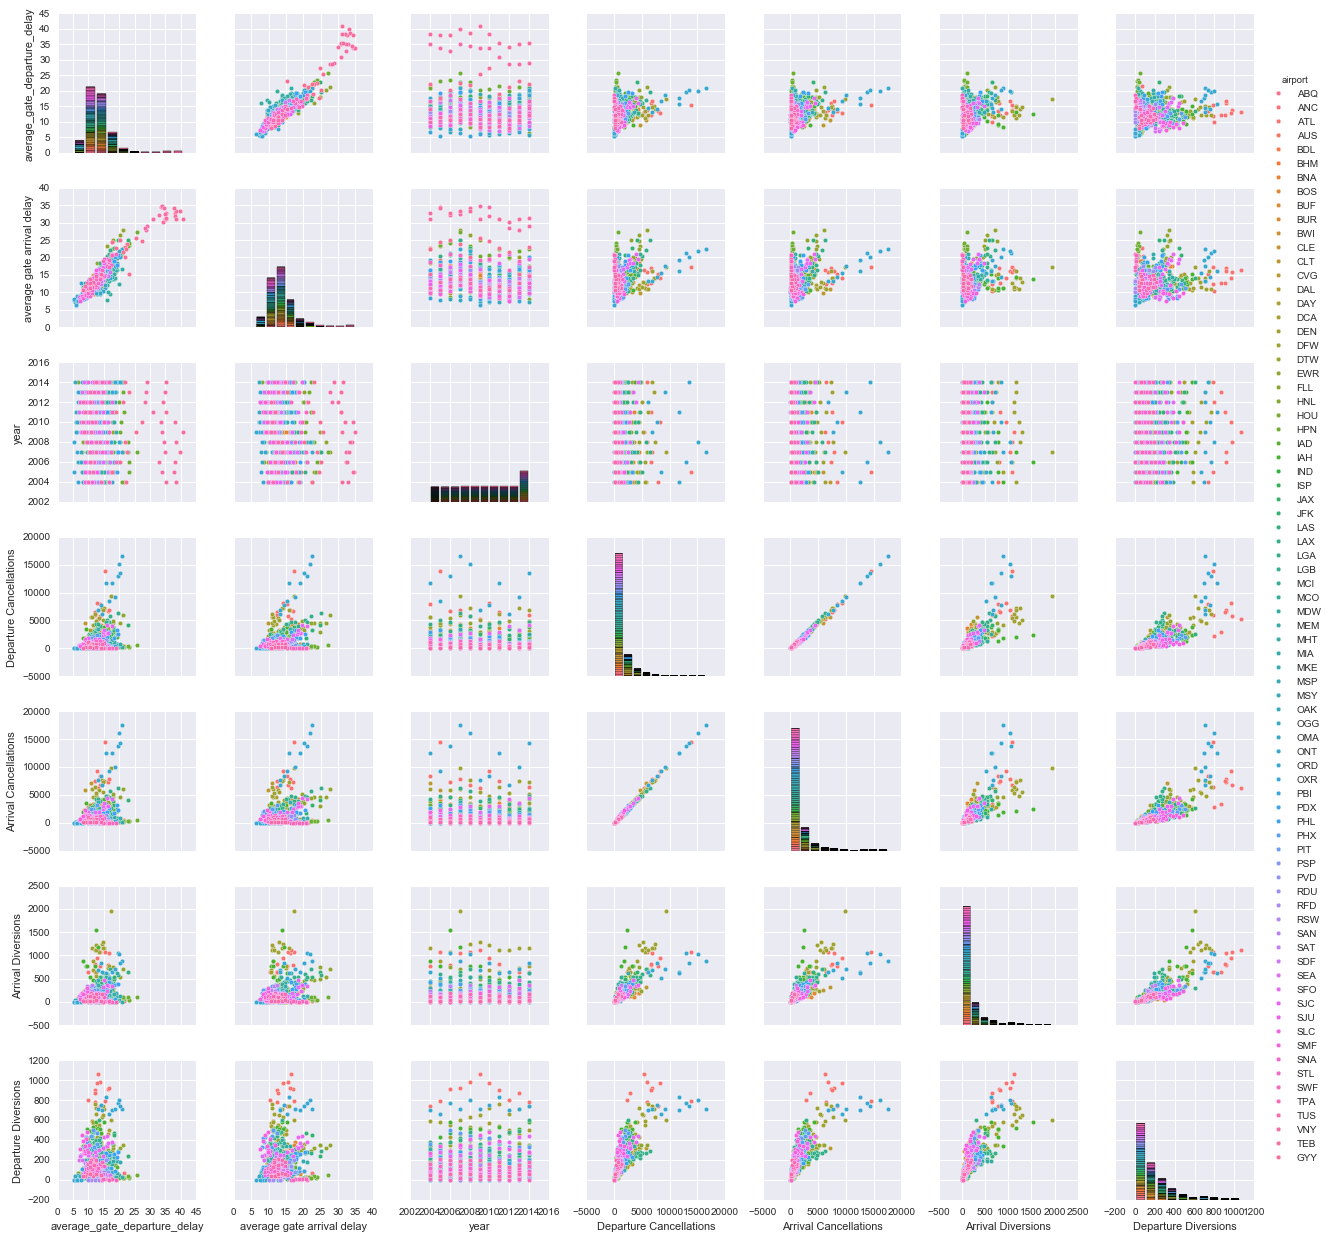

In [29]:
#plot before change Airport to numeric
# Do you see any patterns in relationships of the scatter plot matrix
sns.set()
sns.pairplot(ap, hue="airport")

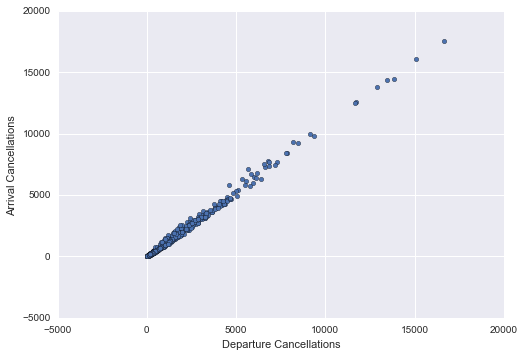

In [30]:
df.plot(kind='scatter',x='Departure Cancellations',y='Arrival Cancellations')

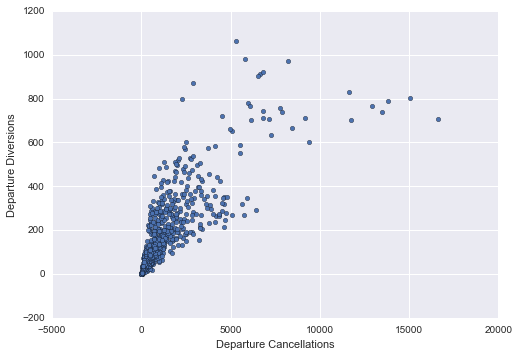

In [31]:
ap.plot(kind='scatter',x='Departure Cancellations',y='Departure Diversions')

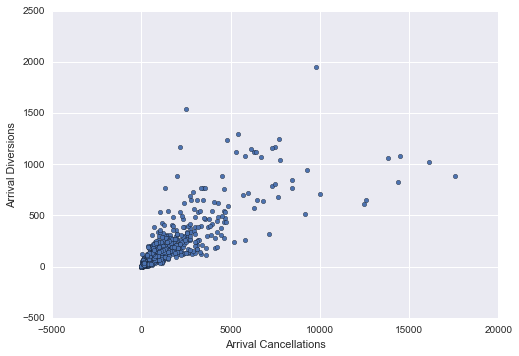

In [32]:
ap.plot(kind='scatter',x='Arrival Cancellations',y='Arrival Diversions')

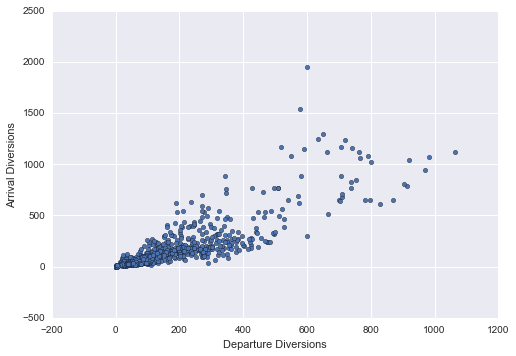

In [33]:
ap.plot(kind='scatter',x='Departure Diversions',y='Arrival Diversions')

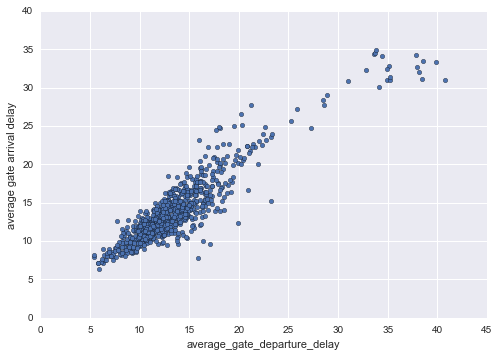

In [34]:
ap.plot(kind='scatter',x='average_gate_departure_delay',y='average gate arrival delay')

#### Are there any unique values? 

In [35]:
##Check for Unique Values 

df.airport.unique()

array([u'ABQ', u'ANC', u'ATL', u'AUS', u'BDL', u'BHM', u'BNA', u'BOS',
       u'BUF', u'BUR', u'BWI', u'CLE', u'CLT', u'CVG', u'DAL', u'DAY',
       u'DCA', u'DEN', u'DFW', u'DTW', u'EWR', u'FLL', u'HNL', u'HOU',
       u'HPN', u'IAD', u'IAH', u'IND', u'ISP', u'JAX', u'JFK', u'LAS',
       u'LAX', u'LGA', u'LGB', u'MCI', u'MCO', u'MDW', u'MEM', u'MHT',
       u'MIA', u'MKE', u'MSP', u'MSY', u'OAK', u'OGG', u'OMA', u'ONT',
       u'ORD', u'OXR', u'PBI', u'PDX', u'PHL', u'PHX', u'PIT', u'PSP',
       u'PVD', u'RDU', u'RFD', u'RSW', u'SAN', u'SAT', u'SDF', u'SEA',
       u'SFO', u'SJC', u'SJU', u'SLC', u'SMF', u'SNA', u'STL', u'SWF',
       u'TPA', u'TUS', u'VNY', u'TEB', u'GYY'], dtype=object)

### Part 3: Data Mining

#### 3.1 Create Dummy Variables

In [36]:
df1 = df.dropna(how = 'any')
df1.head()

,airport,year,departures for metric computation,arrivals for metric computation,percent on-time gate departures,percent on-time airport departures,percent on-time gate arrivals,average_gate_departure_delay,average_taxi_out_time,average taxi out delay,average airport departure delay,average airborne delay,average taxi in delay,average block delay,average gate arrival delay,Departure Cancellations,Arrival Cancellations,Departure Diversions,Arrival Diversions
0,ABQ,2004,53971,53818,0.8030,0.7809,0.7921,10.38,9.89,2.43,12.10,2.46,0.83,2.55,10.87,242.0,235.0,71.0,46.0
1,ABQ,2005,51829,51877,0.8140,0.7922,0.8001,9.60,9.79,2.29,11.20,2.26,0.89,2.34,10.24,221.0,190.0,61.0,33.0
2,ABQ,2006,49682,51199,0.7983,0.7756,0.7746,10.84,9.89,2.16,12.33,2.12,0.84,2.66,11.82,392.0,329.0,71.0,124.0
3,ABQ,2007,53255,53611,0.8005,0.7704,0.7647,11.29,10.34,2.40,12.95,2.19,1.29,3.06,12.71,366.0,304.0,107.0,45.0
4,ABQ,2008,49589,49512,0.8103,0.7844,0.7875,10.79,10.41,2.41,12.32,1.82,1.03,2.79,11.48,333.0,300.0,79.0,42.0


In [37]:
le = preprocessing.LabelEncoder()
df1.airport = le.fit_transform(df1.airport)

//anaconda/lib/python2.7/site-packages/pandas/core/generic.py:2698: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[name] = value


#### 3.2 Format and Clean the Data

In [38]:
df1.columns

Index([u'airport', u'year', u'departures for metric computation',
       u'arrivals for metric computation', u'percent on-time gate departures',
       u'percent on-time airport departures', u'percent on-time gate arrivals',
       u'average_gate_departure_delay', u'average_taxi_out_time',
       u'average taxi out delay', u'average airport departure delay',
       u'average airborne delay', u'average taxi in delay',
       u'average block delay', u'average gate arrival delay',
       u'Departure Cancellations', u'Arrival Cancellations',
       u'Departure Diversions', u'Arrival Diversions'],
      dtype='object')

In [39]:
arr_can = df1['Arrival Cancellations']
arr_div = df1['Arrival Diversions']
dep_can = df1['Departure Cancellations']
dep_div = df1['Departure Cancellations']
avg_del = df1['average_gate_departure_delay']
avg_arr = df1['average gate arrival delay']

In [40]:
del df1['departures for metric computation']
del df1['arrivals for metric computation']

In [41]:
df1.shape

(799, 17)

### Part 4: Define the Data

#### 4.1 Confirm that the dataset has a normal distribution. How can you tell? 

In [42]:
normaltest(df1)

NormaltestResult(statistic=array([ 526.74257131,  610.35370293,  126.79779757,  139.0504605 ,
        124.9829939 ,   45.2717115 ,  295.08863972,  462.20657534,
        194.81532975,  142.94812843,  254.26970344,  110.95544514,
        135.43205183,  677.34396372,  672.85698189,  336.47828022,
        540.32889134]), pvalue=array([  4.16201794e-115,   2.90654736e-133,   2.92555386e-028,
         6.39110789e-031,   7.24916038e-028,   1.47697368e-010,
         8.36211330e-065,   4.29652570e-101,   4.97036921e-043,
         9.10349823e-032,   6.10991884e-056,   8.05992905e-025,
         3.90214685e-030,   8.25328995e-148,   7.77969961e-147,
         8.60339396e-074,   4.66736795e-118]))

In [43]:
df_normalized = preprocessing.normalize(df1, norm='l2')
df_normalized

array([[  0.00000000e+00,   9.85215356e-01,   3.94774417e-04, ...,
          1.15531741e-01,   3.49053345e-02,   2.26147237e-02],
       [  0.00000000e+00,   9.88967957e-01,   4.01506193e-04, ...,
          9.37176618e-02,   3.00883019e-02,   1.62772781e-02],
       [  0.00000000e+00,   9.66605695e-01,   3.84666663e-04, ...,
          1.58531044e-01,   3.42118666e-02,   5.97503022e-02],
       ..., 
       [  3.61345985e-02,   9.95928933e-01,   4.25645770e-04, ...,
          5.29644114e-02,   1.88097910e-02,   1.43548405e-02],
       [  3.59808316e-02,   9.92183753e-01,   4.01457360e-04, ...,
          7.54118799e-02,   3.05590624e-02,   8.87198587e-03],
       [  3.59537159e-02,   9.91928545e-01,   3.89777681e-04, ...,
          7.63400817e-02,   2.70884161e-02,   1.92081496e-02]])

#### 4.2 Find correlations in the data

In [44]:
pearsonr(arr_can, arr_div)

(0.79377287741893199, 2.7808920552001203e-174)

In [45]:
pearsonr(arr_can, dep_can)

(0.99746410093579696, 0.0)

In [46]:
pearsonr(arr_can, dep_div)

(0.99746410093579696, 0.0)

In [47]:
pearsonr(arr_div, dep_can)

(0.79225289126660881, 3.7085041856429547e-173)

In [48]:
pearsonr(arr_div, dep_div)

(0.79225289126660881, 3.7085041856429547e-173)

In [49]:
pearsonr(dep_can, dep_div)

(1.0, 0.0)

In [50]:
pearsonr(avg_del, avg_arr)

(0.85025914716636364, 2.4355715085123558e-224)

#### 4.3 What is the value of understanding correlations before PCA? 

The value of understanding correlations before PCA would be to determine underlying causes in the data or to help verify assumptions or results we would get through PCA. The more correlated two variables are, the higher their Eigenvalues for the PCA.

#### 4.4 Validate your findings using statistical analysis

In [51]:
df1.describe()

,airport,year,percent on-time gate departures,percent on-time airport departures,percent on-time gate arrivals,average_gate_departure_delay,average_taxi_out_time,average taxi out delay,average airport departure delay,average airborne delay,average taxi in delay,average block delay,average gate arrival delay,Departure Cancellations,Arrival Cancellations,Departure Diversions,Arrival Diversions
count,799.000000,799.000000,799.000000,799.000000,799.000000,799.000000,799.000000,799.000000,799.000000,799.000000,799.000000,799.000000,799.000000,799.000000,799.000000,799.000000,799.000000
mean,36.115144,2009.016270,0.779123,0.726958,0.766864,12.890250,13.872879,3.683292,15.703504,2.875532,1.414155,3.290826,13.428811,1299.314143,1341.068836,174.250313,170.256571
std,21.367104,3.150126,0.052279,0.076027,0.050502,3.036474,3.806217,2.337325,4.364217,1.169739,0.854702,0.989275,3.251647,1840.877193,1980.459892,172.638408,229.162686
min,0.000000,2004.000000,0.529900,0.380800,0.513600,5.350000,7.240000,0.100000,6.290000,0.950000,0.020000,1.330000,6.330000,0.000000,0.000000,0.000000,0.000000
25%,18.000000,2006.000000,0.753100,0.691800,0.742150,10.830000,11.475000,2.300000,12.890000,2.035000,0.845000,2.615000,11.270000,349.000000,314.500000,62.000000,41.000000
50%,36.000000,2009.000000,0.784100,0.740200,0.770500,12.540000,12.940000,3.050000,15.130000,2.620000,1.140000,3.130000,12.970000,670.000000,653.000000,111.000000,84.000000
75%,54.000000,2012.000000,0.810700,0.773700,0.797600,14.620000,15.745000,4.220000,17.555000,3.550000,1.775000,3.815000,14.935000,1483.500000,1542.000000,237.000000,190.000000
max,73.000000,2014.000000,0.909700,0.897400,0.880300,25.840000,35.760000,18.940000,40.510000,7.820000,6.180000,7.520000,27.780000,16618.000000,17571.000000,1064.000000,1948.000000


#### 4.5 How can you improve your overall analysis? 

Answer: 

### Part 5: Perform a PCA and Present Findings

#### 5.1 Conduct the PCA

In [52]:
# Define your "X" and "Y" variables
x = df1.ix[:,1:11]
y = df1.ix[:,0]

In [53]:
X = x.as_matrix(columns=None)
Y = pd.get_dummies(y, columns=None)

In [54]:
# Standardize the X values
xStand = preprocessing.StandardScaler().fit_transform(X)

In [55]:
# Create the Covariance Matrix
covMat = np.cov(xStand.T)
eigenValues, eigenVectors = np.linalg.eig(covMat)

In [56]:
# Check the Eigenvalues
print(eigenValues)

[  5.57134817e+00   2.02532811e+00   1.13757778e+00   5.38157783e-01
   3.44410674e-01   2.01058871e-01   1.18303333e-01   7.09789467e-02
   4.39254009e-03   9.75127064e-04]


In [57]:
# Check the Eigenvectors
print(eigenVectors)

[[ -4.84785278e-02  -1.46419135e-01  -8.60439123e-01  -4.10298549e-01
    5.90891707e-02  -2.01899195e-01   1.43431599e-01  -3.62527337e-02
   -3.65681963e-02   5.65269209e-03]
 [ -3.16955661e-01   4.25861382e-01  -2.16033519e-02  -9.89166336e-02
   -3.03309241e-01  -2.67045396e-01  -2.98155041e-01  -3.86248554e-01
    5.45557303e-01   9.43562616e-02]
 [ -4.11141921e-01   6.90730466e-02   3.94002061e-02   4.95200527e-03
   -2.74925575e-02  -3.28785829e-01  -4.48747285e-01  -2.19046021e-02
   -7.03223940e-01  -1.39213963e-01]
 [ -3.02396993e-01   3.71089649e-01  -1.74627423e-01  -6.61042525e-02
    4.66008617e-01   6.93330127e-01  -1.90534971e-01  -3.79378781e-02
   -1.79757779e-02   6.88035620e-03]
 [  3.51104178e-01  -3.53689469e-01  -6.65168692e-02   1.71947548e-02
    1.33489791e-01   5.06324207e-02  -6.31217545e-01  -1.59702701e-01
    2.64905935e-02   5.49439718e-01]
 [  3.13975893e-01   4.07658454e-01  -1.46018039e-01  -1.17039894e-01
   -3.28482337e-01   4.72470431e-02  -3.03913

In [58]:
# Print the EigenPairs
eigenPairs = [(np.abs(eigenValues[i]), eigenVectors[:,i]) for i in range(len(eigenValues))]
eigenPairs.sort()
eigenPairs.reverse()
for i in eigenPairs:
    print(i[0])

5.57134816556
2.02532810832
1.13757777909
0.538157783466
0.344410673833
0.201058871442
0.118303332758
0.0709789467021
0.00439254008636
0.000975127064389


In [59]:
# Calculate the Explained Variance
totalEigen = sum(eigenValues)
varExpl = [(i / totalEigen)*100 for i in sorted(eigenValues, reverse=True)]

In [60]:
print(varExpl)

[55.643752642282195, 20.227932796446442, 11.361540271784545, 5.374842443124062, 3.4397962167520473, 2.008072333051389, 1.18155268511248, 0.70890111975344117, 0.043870425393229752, 0.0097390663001568865]


In [61]:
cvarex = np.cumsum(varExpl)

In [62]:
print(cvarex)

[ 55.64375264  75.87168544  87.23322571  92.60806815  96.04786437
  98.0559367   99.23748939  99.94639051  99.99026093 100.        ]


In [63]:
# Conduct the PCA
PCA_air = PCA(n_components=3)
Y = PCA_air.fit_transform(xStand)

In [64]:
print Y

[[ 1.91299331  0.02485836  1.65618144]
 [ 2.33785171  0.18731793  1.31705477]
 [ 1.82134175 -0.41523131  1.05584941]
 ..., 
 [ 3.31156678  0.42391239 -0.73787986]
 [ 2.09026109 -0.59400023 -0.95537774]
 [ 1.3059111  -1.22583925 -1.20681319]]


In [65]:
# Create a Dataframe the PCA Results
Ydf = pd.DataFrame(Y, columns=["PC1", "PC2", "PCA3"])

In [66]:
airports2 = df[['airport', 'year']]

In [67]:
airport_pca = airports2.join(Ydf, on=None, how='left').sort('PC1', ascending = False)
airport_pca.dropna()

/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:1: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)
  if __name__ == '__main__':


,airport,year,PC1,PC2,PCA3
502,OGG,2011,5.406761,1.229168,-0.591054
505,OGG,2014,5.244610,1.236482,-1.328765
501,OGG,2010,5.241279,1.292650,-0.258351
503,OGG,2012,5.188584,1.068869,-1.034687
500,OGG,2009,5.164972,1.130606,0.056761
544,OXR,2009,5.060717,1.045925,0.076385
539,OXR,2004,4.899848,0.850467,1.477206
540,OXR,2005,4.891119,1.168892,1.378939
545,OXR,2010,4.765617,0.538665,-0.126056
504,OGG,2013,4.736555,0.754334,-1.305611


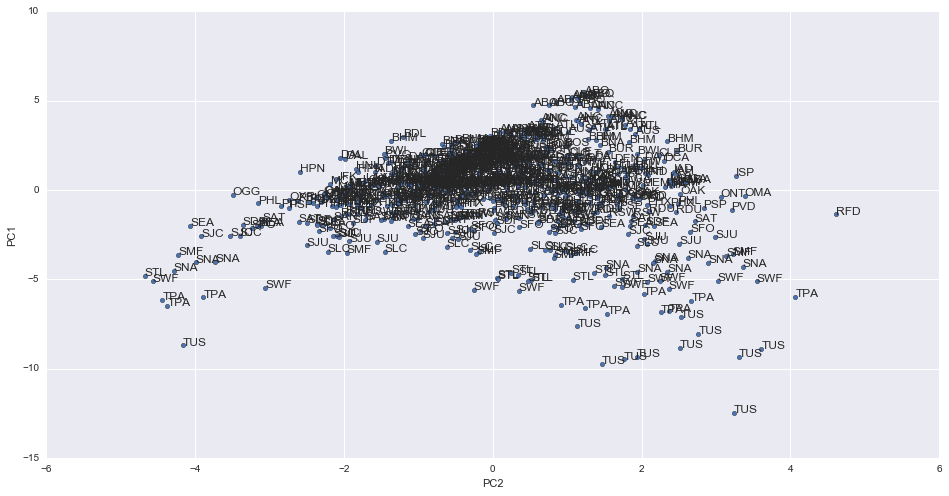

In [68]:
# Graph the results to a new feature space
graph = airport_pca.plot(kind='scatter', x='PC2', y='PC1', figsize=(16,8))

for i, airport in enumerate(df['airport']):
    graph.annotate(airport, (airport_pca.iloc[i].PC2, airport_pca.iloc[i].PC1))

In [69]:
print PCA_air.n_components
print PCA_air.explained_variance_
print PCA_air.explained_variance_ratio_
x_vals = np.arange(1, PCA_air.n_components)

3
[ 5.56437526  2.02279328  1.13615403]
[ 0.55643753  0.20227933  0.1136154 ]


#### 5.2 Write an analysis plan of your findings 

Create a writeup on the interpretation of findings including an executive summary with conclusions and next steps

### Part 6: Copy your Database to AWS 

Make sure to properly document all of the features of your dataset

In [70]:
# ## Create a PostgreSQL database on AWS using the Amazon database wizard on AWS

# ## Connect to the DB
# psql --host=<DB instance endpoint> --port=<port> --username=<master user name> --password --dbname=<database name> 

# ## Transfer 
# select * into newtable from airport_ops

### Bonus: Create a 3-Dimensional Plot of your new dataset with PCA applied